In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('TaxiFare.csv')

### Data Cleaning 

In [3]:
data.head()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [4]:
data.tail()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
49995           40.748531            -74.016899            40.705993   
49996           40.768211            -73.987366            40.760597   
49997           40.739428            -73.998108            40.759483   
49998           40.777567            -73.953450            40.779687   
49999           40.763805            -73.932603            40.763805   

       no_of_passenger  
49995                1  
49996                1  
49997                1  
49998                2  
49999                1

In [5]:
data.shape

(50000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
# spliting data and time
data['date'] = data['date_time_of_pickup'].str.split(' ').str[0]
data['time'] = data['date_time_of_pickup'].str.split(' ').str[1]
# Extract the hour from the 'time' column and create a new 'hour' column
data['hour'] = data['time'].str.split(':').str[0].astype(int)

In [10]:
data.drop('date_time_of_pickup', axis=1, inplace=True)
data.drop('unique_id', axis=1, inplace=True)

In [11]:
data.head()

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0     4.5           -73.844311           40.721319            -73.841610   
1    16.9           -74.016048           40.711303            -73.979268   
2     5.7           -73.982738           40.761270            -73.991242   
3     7.7           -73.987130           40.733143            -73.991567   
4     5.3           -73.968095           40.768008            -73.956655   

   latitude_of_dropoff  no_of_passenger        date      time  hour  
0            40.712278                1  2009-06-15  17:26:21    17  
1            40.782004                1  2010-01-05  16:52:16    16  
2            40.750562                2  2011-08-18  00:35:00     0  
3            40.758092                1  2012-04-21  04:30:42     4  
4            40.783762                1  2010-03-09  07:51:00     7

In [12]:
data.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  50000.000000         50000.000000        50000.000000   
mean      11.364171           -72.509756           39.933759   
std        9.685557            10.393860            6.224857   
min       -5.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734880   
50%        8.500000           -73.981840           40.752678   
75%       12.500000           -73.967148           40.767360   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  \
count          50000.000000         50000.000000     50000.000000   
mean             -72.504616            39.926251         1.667840   
std               10.407570             6.014737         1.289195   
min              -84.654241           -74.006377         0.000000   
25%              -73.991152            40.734372         1.000000   
50%              -73.980082            40.753372         1.000000   
75%              -73.963584            40.768167         2.000000   
max               40.851027            43.415190         6.000000   

               hour  
count  50000.000000  
mean      13.489080  
std        6.506935  
min        0.000000  
25%        9.000000  
50%       14.000000  
75%       19.000000  
max       23.000000

In [13]:
data = data[data.amount>=1]

# Filter values that are within the latitude valid range (-90 to 90) and longitude range(-180,180)
valid_range = (-90, 90, -180,180)
# Latitude
data = data[(data['latitude_of_pickup'] >= valid_range[0]) & (data['latitude_of_pickup'] <= valid_range[1]) &
                 (data['latitude_of_dropoff'] >= valid_range[0]) & (data['latitude_of_dropoff'] <= valid_range[1])]
# longitude
data = data[(data['longitude_of_pickup'] >= valid_range[2]) & (data['longitude_of_pickup'] <= valid_range[3]) &
                 (data['longitude_of_dropoff'] >= valid_range[2]) & (data['longitude_of_dropoff'] <= valid_range[3])]


***Excluding data outside range of new york city***

In [14]:
# Define a bounding box for New York City
nyc_bbox = {
    'min_longitude': -74.05,
    'max_longitude': -73.75,
    'min_latitude': 40.6,
    'max_latitude': 40.9
}

# Filter data to keep only records within the bounding box
data = data[(data['longitude_of_pickup'] >= nyc_bbox['min_longitude']) &
                 (data['longitude_of_pickup'] <= nyc_bbox['max_longitude']) &
                 (data['latitude_of_pickup'] >= nyc_bbox['min_latitude']) &
                 (data['latitude_of_pickup'] <= nyc_bbox['max_latitude']) &
                 (data['longitude_of_dropoff'] >= nyc_bbox['min_longitude']) &
                 (data['longitude_of_dropoff'] <= nyc_bbox['max_longitude']) &
                 (data['latitude_of_dropoff'] >= nyc_bbox['min_latitude']) &
                 (data['latitude_of_dropoff'] <= nyc_bbox['max_latitude'])]

In [15]:
data.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  48687.000000         48687.000000        48687.000000   
mean      11.185463           -73.975619           40.750972   
std        9.028712             0.033714            0.026663   
min        2.500000           -74.043349           40.603860   
25%        6.000000           -73.992298           40.736576   
50%        8.500000           -73.982131           40.753450   
75%       12.500000           -73.968478           40.767737   
max      165.000000           -73.756925           40.891938   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  \
count          48687.000000         48687.000000     48687.000000   
mean             -73.974186            40.751591         1.668454   
std                0.032383             0.030113         1.289616   
min              -74.048790            40.601742         0.000000   
25%              -73.991290            40.736151         1.000000   
50%              -73.980490            40.754187         1.000000   
75%              -73.965469            40.768473         2.000000   
max              -73.752772            40.899325         6.000000   

               hour  
count  48687.000000  
mean      13.489124  
std        6.504212  
min        0.000000  
25%        9.000000  
50%       14.000000  
75%       19.000000  
max       23.000000

In [16]:
# function to calculate diatance from longitude and latitude using Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of the Earth in kilometers
    return c * r

In [17]:
# Calculate distance and store in a new column
data['distance_km'] = haversine(data['longitude_of_pickup'], data['latitude_of_pickup'], data['longitude_of_dropoff'], data['latitude_of_dropoff'])
data['fare_per_km'] = data['amount'] / data['distance_km']

In [18]:
data.head(1)

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0     4.5           -73.844311           40.721319             -73.84161   

   latitude_of_dropoff  no_of_passenger        date      time  hour  \
0            40.712278                1  2009-06-15  17:26:21    17   

   distance_km  fare_per_km  
0     1.030764     4.365694

### Exploratory Data Analysis

<Axes: >

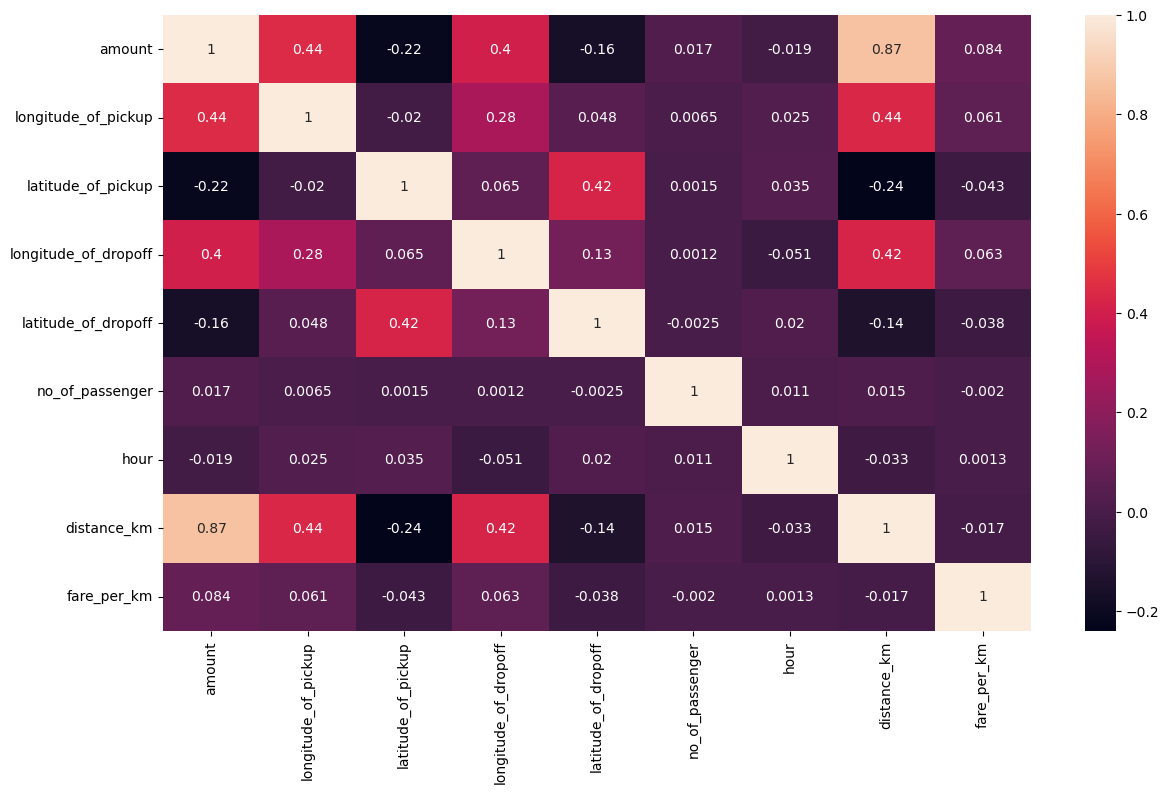

In [19]:
corr = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)

In [20]:
corr

amount  longitude_of_pickup  latitude_of_pickup  \
amount                1.000000             0.443679           -0.218767   
longitude_of_pickup   0.443679             1.000000           -0.020329   
latitude_of_pickup   -0.218767            -0.020329            1.000000   
longitude_of_dropoff  0.399666             0.280373            0.065279   
latitude_of_dropoff  -0.164436             0.047829            0.422035   
no_of_passenger       0.017492             0.006482            0.001478   
hour                 -0.019067             0.025219            0.034746   
distance_km           0.869063             0.436336           -0.240301   
fare_per_km           0.084171             0.060914           -0.042532   

                      longitude_of_dropoff  latitude_of_dropoff  \
amount                            0.399666            -0.164436   
longitude_of_pickup               0.280373             0.047829   
latitude_of_pickup                0.065279             0.422035   
longitude_of_dropoff              1.000000             0.127321   
latitude_of_dropoff               0.127321             1.000000   
no_of_passenger                   0.001178            -0.002495   
hour                             -0.050858             0.019614   
distance_km                       0.421300            -0.138709   
fare_per_km                       0.062649            -0.037957   

                      no_of_passenger      hour  distance_km  fare_per_km  
amount                       0.017492 -0.019067     0.869063     0.084171  
longitude_of_pickup          0.006482  0.025219     0.436336     0.060914  
latitude_of_pickup           0.001478  0.034746    -0.240301    -0.042532  
longitude_of_dropoff         0.001178 -0.050858     0.421300     0.062649  
latitude_of_dropoff         -0.002495  0.019614    -0.138709    -0.037957  
no_of_passenger              1.000000  0.010682     0.015283    -0.001955  
hour                         0.010682  1.000000    -0.033167     0.001272  
distance_km                  0.015283 -0.033167     1.000000    -0.017253  
fare_per_km                 -0.001955  0.001272    -0.017253     1.000000

##### Insights 
- The 'amount' column has a strong positive correlation with 'distance_km' indicating that as the distance increases, the fare amount also tends to increase.
- moderate positive correlation between 'amount' and 'longitude_of_pickup' suggesting that the fare amount may be higher for longer trips.
- The 'amount' column also has a positive correlation   with'longitude_of_dropoff' indicating that the fare amount tends to increase as the longitude of the dropoff location increases.
- There is a negative correlation between 'amount' and 'latitude_of_pickup' suggesting that the fare amount may be lower for trips that start at higher latitudes.
- 'distance_km' has a strong positive correlation with 'longitude_of_pickup'indicating that longer trips may start at locations with higher longitudes.
- 'fare_per_km' has a small negative correlation with 'latitude_of_pickup' suggesting a slight decrease in fare per kilometer for trips that start at higher latitudes.

<Axes: xlabel='no_of_passenger', ylabel='amount'>

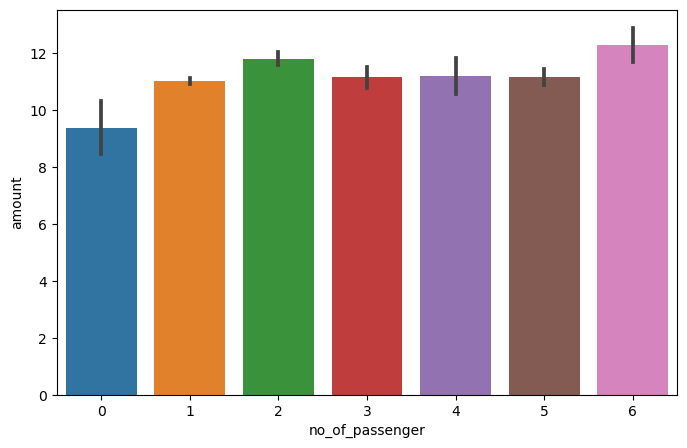

In [21]:
# checking relation b/w number of passenger and amount
plt.figure(figsize=(8,5))
sns.barplot(x='no_of_passenger', y='amount', data=data)

<Axes: xlabel='no_of_passenger', ylabel='amount'>

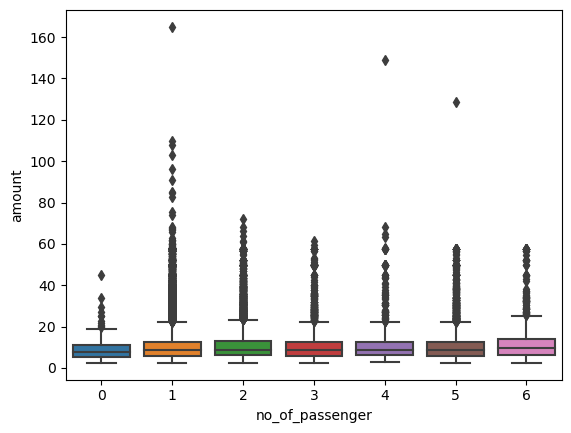

In [22]:
sns.boxplot(x='no_of_passenger', y='amount', data=data)

- as there are outliers present in no. of passenger means there might be other factor that effect the amount like, at what time passenger is travelling, how far he travelled

<Axes: xlabel='longitude_of_pickup', ylabel='amount'>

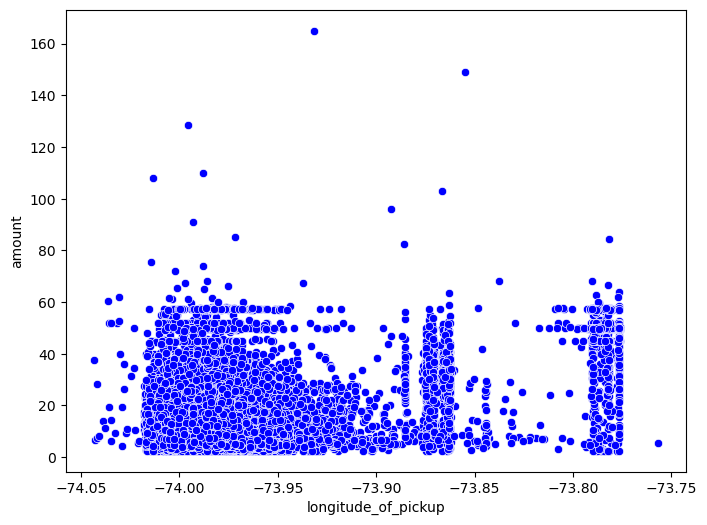

In [23]:
# checking relation b/w amount and longitude_of_pickup
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='longitude_of_pickup', y='amount', color='blue')

<Axes: xlabel='latitude_of_dropoff', ylabel='amount'>

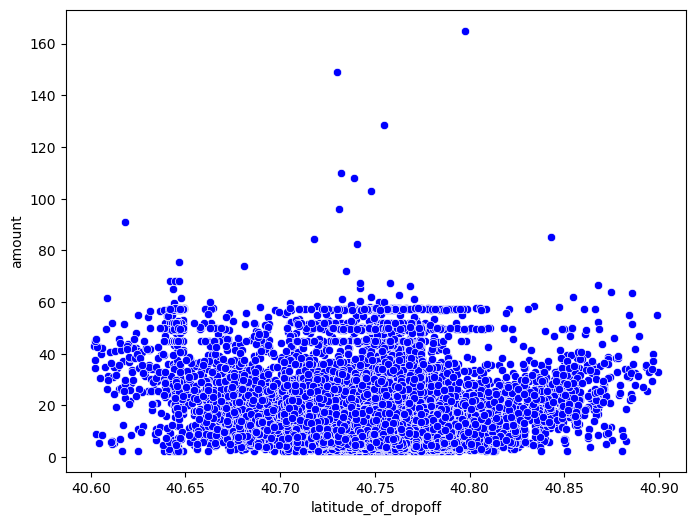

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='latitude_of_dropoff', y='amount', color='blue')

In [25]:
avg_longitude_of_pickup = data.longitude_of_pickup.mean()
avg_latitude_of_dropoff = data.latitude_of_dropoff.mean()

In [26]:
avg_longitude_of_pickup,avg_latitude_of_dropoff

(-73.97561900801918, 40.7515911894972)

<Axes: xlabel='amount', ylabel='Count'>

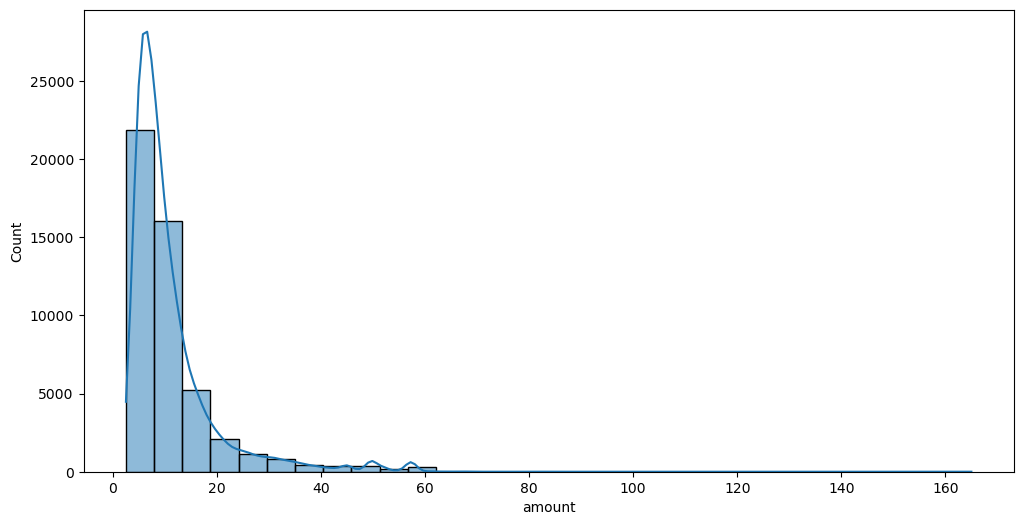

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='amount', bins=30, kde=True)

In [28]:
avg_amount = data.amount.mean()
avg_amount

11.185463470741675

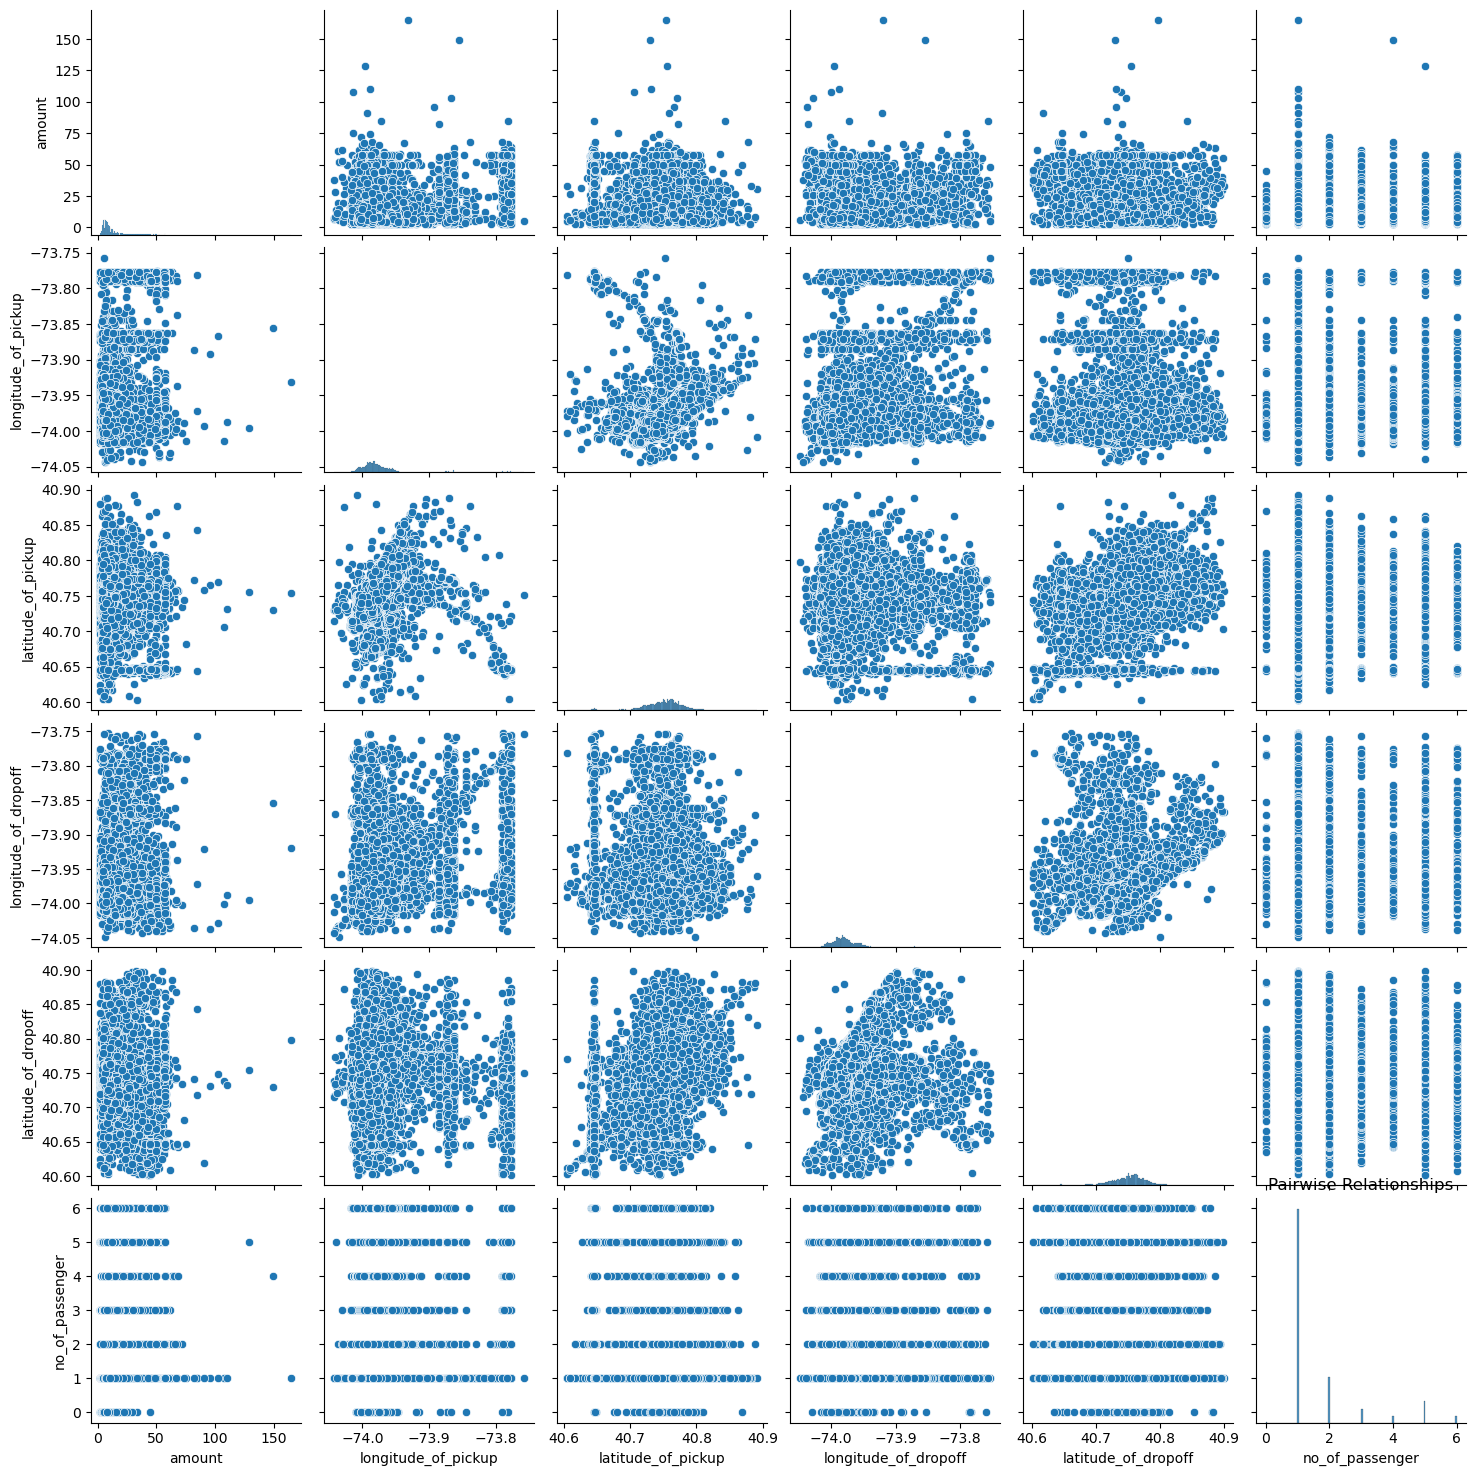

In [29]:
sns.pairplot(data[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']])
plt.title('Pairwise Relationships')
plt.show()

In [30]:
data['date'] = pd.to_datetime(data['date'])
fig = px.line(data, x='date', y='amount', title='Date vs Amount')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Amount')
fig.update_layout(xaxis_rangeslider_visible=True)

In [31]:
average_amount_by_date = data.groupby('date')['amount'].max().sort_values(ascending=False)
average_amount_by_date

date
2014-11-01    165.00
2014-08-14    149.00
2009-12-03    128.61
2014-02-07    110.00
2014-12-12    108.00
               ...  
2010-08-02     10.10
2012-02-27     10.10
2012-07-30      9.70
2010-03-15      8.50
2010-12-27      7.70
Name: amount, Length: 2371, dtype: float64

- highest amount was on month Novemeber 2014 with an avg 165
- lowest amount was on month December 2012 with an avg 7.70

Text(0.5, 1.0, 'Line Plot: Amount vs. Distance (km)')

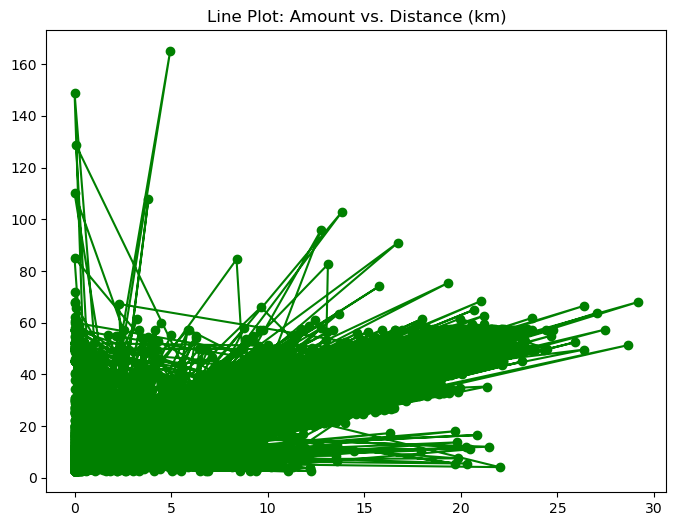

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(data['distance_km'], data['amount'], marker='o', linestyle='-', color='green')
plt.title('Line Plot: Amount vs. Distance (km)')

Text(0, 0.5, 'Frequency')

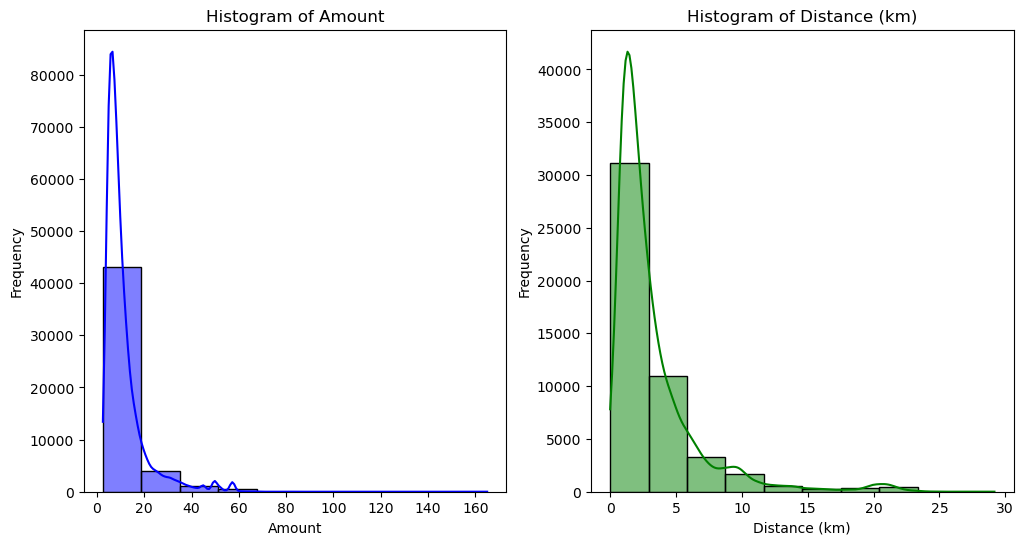

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for 'amount'
sns.histplot(data=data, x='amount', bins=10, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Histogram for 'distance_km'
sns.histplot(data=data, x='distance_km', bins=10, kde=True, color='green', ax=axes[1])
axes[1].set_title('Histogram of Distance (km)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')


<Axes: xlabel='hour', ylabel='count'>

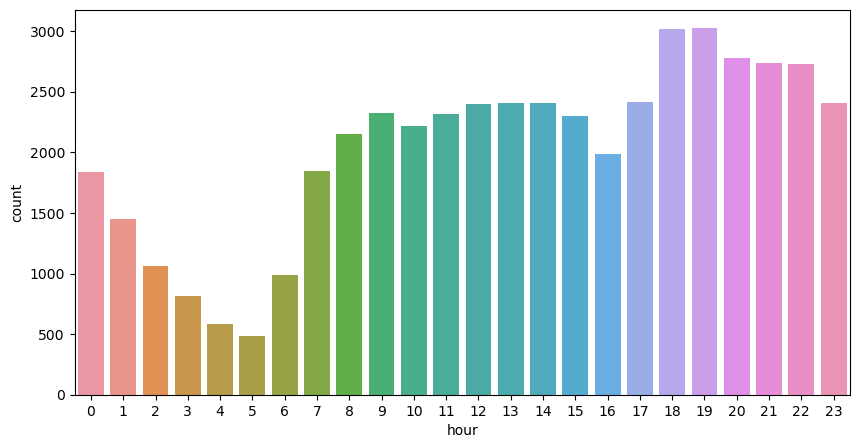

In [34]:
# Plot the number of fares per hour
plt.figure(figsize = (10,5))
new_df = data.groupby('hour', as_index = False)['amount'].agg(['count'])
sns.barplot(x=new_df.index, y=new_df['count'])

- It can be noiced that fare is at peak 7-8pm this maybe due to office worker taking cabs for home from there office. And during office hours rate is usually high

### Model Building and Evaluation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Define features and target variable
X = data[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'hour']]
y = data['amount']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
# Make predictions
y_pred = dt_regressor.predict(X_test)
y_pred

array([10.1,  7. , 24.5, ..., 10.1,  5.7,  8. ])

In [40]:
# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 33.51969192852742
R-squared (R2) Score: 0.6088771466938594


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Define features and target variable
x = data[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'hour']]
Y = data['amount']

In [43]:
# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [44]:
# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, Y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [46]:
# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", round(r2*100,2))

Mean Squared Error: 19.817390269659068
R-squared (R2) Score: 76.88


In [47]:
### Grid Search CV

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
x = data[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'hour']]
Y = data['amount']

In [49]:
# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [50]:
# define the hyperparameter grid to search
param_grid = {'n_estimators':[100],
             'max_depth': [5, 10, 20, 30],
             'min_samples_split': [2, 5, 10]}

In [51]:
# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [52]:
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)  # Use n_jobs=-1 for parallel processing

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

In [ ]:
# Get the best estimator and predict
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(x_test)